## Урок 6. Домашнее задание

### 6.1 Задание начального уровня

**Задание просто уровня** Дана матрица $A$, вычислите SVD разложение с помощью функции `numpy.linalg.svd`. Найдите [определитель](https://ru.wikipedia.org/wiki/Определитель ) матрицы $U$ с помощью функции `numpy.linalg.det`. Чему равен определитель?

In [2]:
import numpy as np
from numpy.linalg import svd, det

A = np.array([[3,2,2],[2,3,-2]])

In [4]:
U, S, V_t = svd(A)
print(f"{U = }\n{S = }\n{V_t = }")

U = array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])
S = array([5., 3.])
V_t = array([[-7.07106781e-01, -7.07106781e-01, -6.47932334e-17],
       [-2.35702260e-01,  2.35702260e-01, -9.42809042e-01],
       [-6.66666667e-01,  6.66666667e-01,  3.33333333e-01]])


In [5]:
print(f"{det(U) = }")

det(U) = -1.0000000000000004


### 6.2 Задание высокого уровня

В домашней работе предлагаю Вам немного поработать с изображениями (похожий трюк можно увидеть в этой [статье на хабре](https://habr.com/ru/post/275273/)). Для этого нужно установить модуль Pillow (если у вас Анаконда, то https://anaconda.org/anaconda/pillow)

<pre>
pip install Pillow
</pre>

Загрузим картинку в трёхмерный *numpy array* и отобразим её прямо в jupyter notebook.

In [8]:
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline

<class 'numpy.ndarray'> (380, 509, 3)


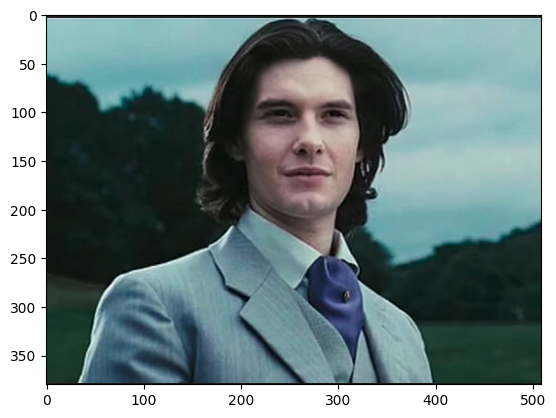

In [9]:
img = mpimg.imread('data/dorian_grey.png')
print(type(img),img.shape)
imshow(img)
plt.show()

У нас трёхмерный массив, где третье измерение соответствует цветовой компоненте rgb. Цветную картинку можно преобразовать в двумерную серую (grayscale) с помощью формулы, которую я нашёл [тут](https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python)

<class 'numpy.ndarray'> (380, 509)


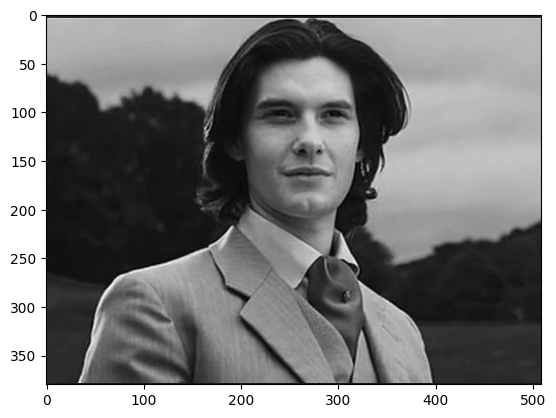

In [11]:
def rgb2gray(rgb):
    ''' Берётся среднее трёх цветов RGB'''
    tile = np.tile(np.c_[0.333, 0.333, 0.333], reps=(rgb.shape[0],rgb.shape[1],1))
    return np.sum(tile * rgb, axis=2)

img_gray = rgb2gray(img)
print(type(img_gray), img_gray.shape)
imshow(img_gray, cmap = "gray")
plt.show()

Далее

* обучите на массиве *img_gray* размерности $894 \times 588$ класс TruncatedSVD c параметром n_components=5
* получите матрицу *img_gray_svd* с помощью функции `transform`
* получите массив *img_gray_svd_restored* с помощью функции `inverse_transform`
* визуализируйте массив *img_gray_svd_restored* с помощью функции *imshow*

Этот алгоритм демонстрирует, как происходит сжатие данных большой размерности. А результате у вас должна получится фотка как бы в очень нечётком виде

![grey_pca.png](https://248006.selcdn.ru/public/DS.%20Block%202.%20M8/grey_pca.png)

In [12]:
from sklearn.decomposition import TruncatedSVD

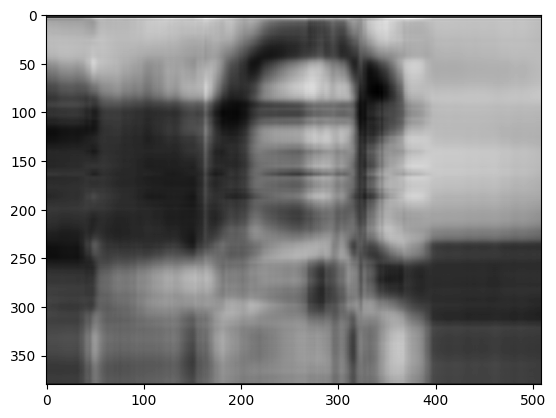

In [13]:
svd = TruncatedSVD(n_components=5).fit(img_gray)

img_gray_svd = svd.transform(img_gray)
img_gray_svd_restored = svd.inverse_transform(img_gray_svd)
imshow(img_gray_svd_restored, cmap = "gray")
plt.show()

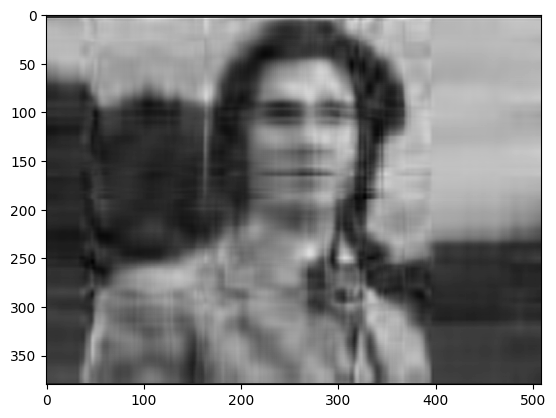

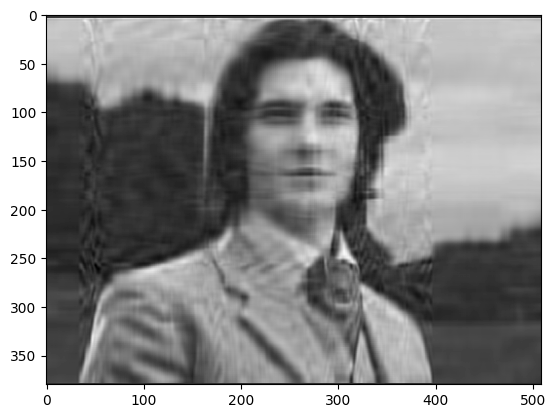

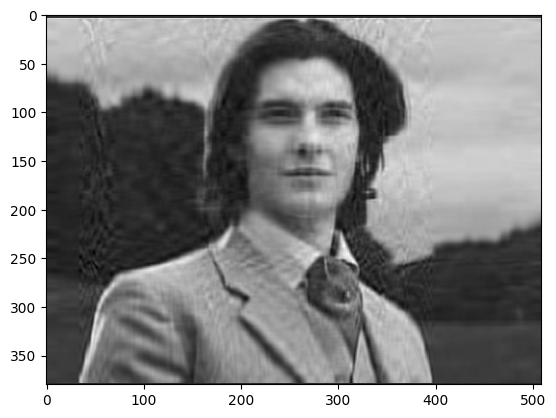

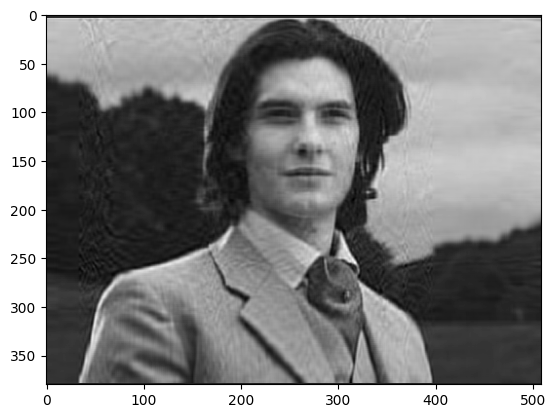

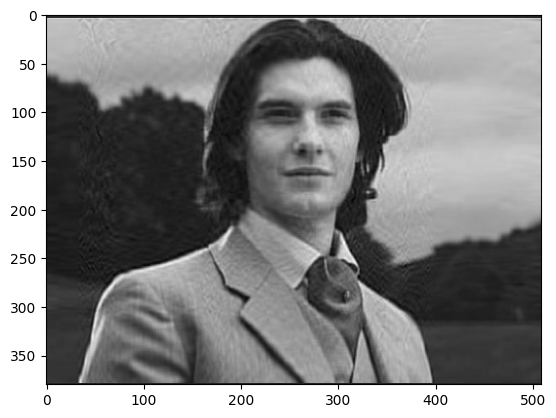

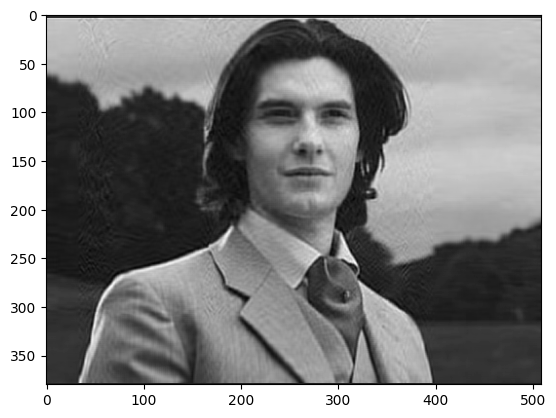

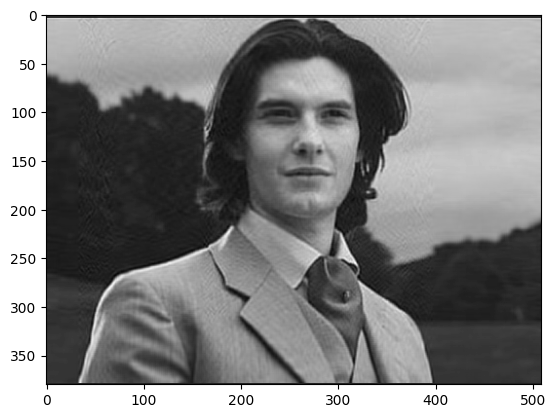

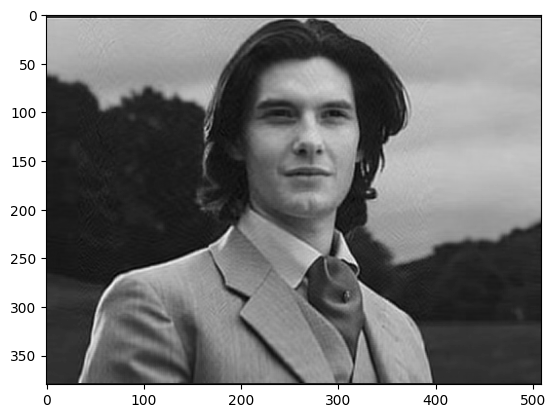

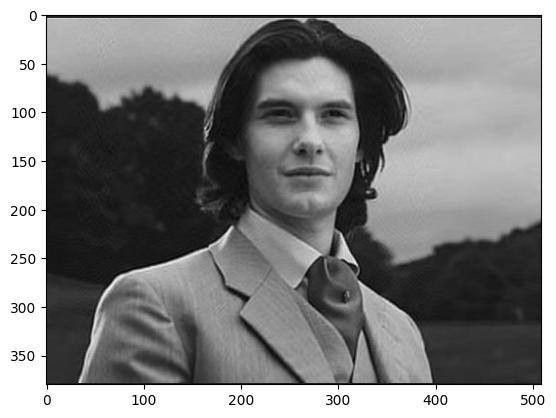

In [15]:
for i in range(10, 100, 10):
    svd = TruncatedSVD(n_components=i).fit(img_gray)
    img_gray_svd = svd.transform(img_gray)
    img_gray_svd_restored = svd.inverse_transform(img_gray_svd)
    imshow(img_gray_svd_restored, cmap = "gray")
    plt.show()

В этом уроке мы познакомились с таким способом снижения размерности, как PCA. Оба метода которые мы же значем выполняют сжатие как линейное преобразование. В следующем уроке рассмотрим нелинейное сжатие